<a href="https://colab.research.google.com/github/shubhamksingh1/TimeSeries/blob/main/WallmartM5/store_wise_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

In [ ]:
! pip install pmdarima

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle/" # put path for wherever you put it kaggle.json

In [ ]:
pwd #Check the present working directory using pwd command

'/content'

In [ ]:
#changing the working directory
%cd /content/drive/MyDrive/Kaggle


/content/drive/MyDrive/Kaggle


In [ ]:
pwd

'/content/drive/MyDrive/Kaggle'

In [ ]:
!kaggle competitions download -c m5-forecasting-accuracy

 51% 8.00M/15.5M [00:00<00:00, 82.2MB/s]
100% 15.5M/15.5M [00:00<00:00, 99.4MB/s]
  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 14.1MB/s]
  0% 0.00/163k [00:00<?, ?B/s]
100% 163k/163k [00:00<00:00, 22.7MB/s]
 57% 9.00M/15.8M [00:00<00:00, 93.6MB/s]
100% 15.8M/15.8M [00:00<00:00, 101MB/s] 
 77% 11.0M/14.2M [00:00<00:00, 38.8MB/s]
100% 14.2M/14.2M [00:00<00:00, 47.2MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip  \*.zip  && rm *.zip 

Archive:  sales_train_validation.csv.zip
  inflating: sales_train_validation.csv  

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  sales_train_evaluation.csv.zip
  inflating: sales_train_evaluation.csv  

Archive:  sell_prices.csv.zip
  inflating: sell_prices.csv         

4 archives were successfully processed.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Kaggle/sales_train_validation.csv
/content/drive/MyDrive/Kaggle/sample_submission.csv
/content/drive/MyDrive/Kaggle/sales_train_evaluation.csv
/content/drive/MyDrive/Kaggle/sell_prices.csv
/content/drive/MyDrive/Kaggle/kaggle.json
/content/drive/MyDrive/Kaggle/calendar.csv
/content/drive/MyDrive/Kaggle/Quora_Que_Pair/my_model.h5
/content/drive/MyDrive/Kaggle/Quora_Que_Pair/submission.csv
/content/drive/MyDrive/Kaggle/Store_Wise_Forecasting/pred_df.csv
/content/drive/MyDrive/Kaggle/Store_Wise_Forecasting/demand_WI_1.csv
/content/drive/MyDrive/Kaggle/Store_Wise_Forecasting/demand_WI_1_total.csv


In [ ]:
import pandas as pd

In [ ]:
from fbprophet import Prophet

# Data Reading

In [ ]:
sales_train_validation = pd.read_csv("/content/drive/MyDrive/Kaggle/sales_train_validation.csv")


In [ ]:
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [ ]:
sales_train_validation.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,0,1,4,2,0,5,3,2,0,5,7,3,1,4,3,3,1,2,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sales_train_evaluation = pd.read_csv("/content/drive/MyDrive/Kaggle/sales_train_evaluation.csv")

In [ ]:
sales_train_evaluation.shape

(30490, 1947)

In [ ]:
sales_train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


# Only WI State DF

In [ ]:
df_WI = sales_train_validation[sales_train_validation['state_id'] == "WI"]

In [ ]:
df_WI.reset_index(drop=True,inplace=True)

In [ ]:
df_WI.shape

(9147, 1919)

In [ ]:
df_WI.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0,1,0,0,1,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1
1,HOBBIES_1_002_WI_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,3,0,0,0,1,3,3,2,0,1,1,1,2,0,0,0,1,0,2,0,1,0,0,1,0,1,1,2,0,0,2,2,0,0,2
2,HOBBIES_1_003_WI_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,2,1,1,0,1,1,0,1
3,HOBBIES_1_004_WI_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,2,1,0,0,0,2,1,1,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,0,1,0,0,1,1,1,3,0,0,...,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,1,0
4,HOBBIES_1_005_WI_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,2,0,2,1,0,3,1,0,1,2,0,0,2,1,0,0,0,1,2,1,1,0,0,0,1,0,0,2,0,1,0,3,1,1,2,1


In [ ]:
df_WI.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
9142,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
9143,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
9144,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
9145,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3
9146,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,0,1,4,2,0,5,3,2,0,5,7,3,1,4,3,3,1,2,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data preprocessing for EDA.

In [ ]:

sales_melt = pd.melt(df_WI, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id',
                                     'state_id'], var_name='day', value_name='demand')

In [ ]:
sales_melt.shape

(17498211, 8)

In [ ]:
sales_melt.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,demand
0,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0
1,HOBBIES_1_002_WI_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0
2,HOBBIES_1_003_WI_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0
3,HOBBIES_1_004_WI_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,d_1,2
4,HOBBIES_1_005_WI_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0


In [ ]:
sales_melt.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,day,demand
17498206,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1
17498207,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0
17498208,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0
17498209,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3
17498210,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1913,0


In [ ]:
calendar = pd.read_csv("/content/drive/MyDrive/Kaggle/calendar.csv")
sell_prices = pd.read_csv("/content/drive/MyDrive/Kaggle/sell_prices.csv")

In [ ]:
calendar.shape,sell_prices.shape

((1969, 14), (6841121, 4))

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
sell_prices[(sell_prices['item_id']=="FOODS_3_823") & (sell_prices['store_id']=="WI_1") & (sell_prices['wm_yr_wk']==11613)]

,store_id,item_id,wm_yr_wk,sell_price
5465995,WI_1,FOODS_3_823,11613,2.98


# Strore WI1

In [ ]:
df_WI_1 = df_WI[df_WI.store_id == "WI_1"]
df_WI_1.reset_index(drop=True,inplace=True)

In [ ]:
df_WI_1.shape

(3049, 1919)

In [ ]:
df_WI_1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0,1,0,0,1,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1
1,HOBBIES_1_002_WI_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,3,0,0,0,1,3,3,2,0,1,1,1,2,0,0,0,1,0,2,0,1,0,0,1,0,1,1,2,0,0,2,2,0,0,2
2,HOBBIES_1_003_WI_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,2,1,1,0,1,1,0,1
3,HOBBIES_1_004_WI_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,2,1,0,0,0,2,1,1,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,0,1,0,0,1,1,1,3,0,0,...,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,1,0
4,HOBBIES_1_005_WI_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,2,0,2,1,0,3,1,0,1,2,0,0,2,1,0,0,0,1,2,1,1,0,0,0,1,0,0,2,0,1,0,3,1,1,2,1


In [ ]:
df_WI_1.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
3044,FOODS_3_823_WI_1_validation,FOODS_3_823,FOODS_3,FOODS,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2,1,0,0,0,2,0,0
3045,FOODS_3_824_WI_1_validation,FOODS_3_824,FOODS_3,FOODS,WI_1,WI,1,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,2,2,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3046,FOODS_3_825_WI_1_validation,FOODS_3_825,FOODS_3,FOODS,WI_1,WI,1,0,1,0,0,2,0,1,0,0,1,0,0,0,0,3,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,3,0,...,1,0,2,1,2,0,1,0,4,0,2,1,0,2,1,2,1,3,5,0,3,0,1,1,0,1,2,1,2,2,0,1,1,0,1,1,4,1,0,2
3047,FOODS_3_826_WI_1_validation,FOODS_3_826,FOODS_3,FOODS,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,1,1,2,1,3,2,1,0,3,2,0,0,2,2,2,0,2,4,1,6,0,0,0,4,2,1,2,2,2,0,2,0,0,1,0,1,1,4,2
3048,FOODS_3_827_WI_1_validation,FOODS_3_827,FOODS_3,FOODS,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,22,0,0,0,0,0,0,0,6,6,0,0,5,0,3,0,4,0,6,5,6,12,4,2,1,0,2,0,4,4,7,3,1,8,3,1,2,0,0


In [ ]:
categories = list(set(df_WI_1['cat_id']))
print("Among 3049 products, the categories are ",categories)
sub_categories=list(set(df_WI_1['dept_id']))
for n,cat_name in enumerate(categories,1):
  d = df_WI_1[df_WI_1['cat_id']==cat_name]
  a=d['cat_id'].value_counts()[0]
  print(n,cat_name,"products",a)
  for sub_cat_name in sub_categories:
    if cat_name in sub_cat_name:
      t = d[d['dept_id']==sub_cat_name]
      ji=t['dept_id'].value_counts()[0]
      print("-->",sub_cat_name,ji)
  print("-----------------------")

Among 3049 products, the categories are  ['FOODS', 'HOBBIES', 'HOUSEHOLD']
1 FOODS products 1437
--> FOODS_1 216
--> FOODS_3 823
--> FOODS_2 398
-----------------------
2 HOBBIES products 565
--> HOBBIES_1 416
--> HOBBIES_2 149
-----------------------
3 HOUSEHOLD products 1047
--> HOUSEHOLD_1 532
--> HOUSEHOLD_2 515
-----------------------


In [ ]:
sales_WI_1 = sales_melt[sales_melt.store_id == "WI_1"]
new_WI_1 = pd.merge(sales_WI_1, calendar, left_on="day", right_on="d", how="left")
new_WI_1 = pd.merge(new_WI_1, sell_prices, left_on=["store_id", "item_id", "wm_yr_wk"],
                    right_on=["store_id", "item_id", "wm_yr_wk"], how="left")

In [ ]:
new_WI_1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,demand,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_WI_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_WI_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_WI_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,d_1,2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,4.34
4,HOBBIES_1_005_WI_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN


In [ ]:
new_WI_1.iloc[:,:17].head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,demand,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1
0,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN
1,HOBBIES_1_002_WI_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN
2,HOBBIES_1_003_WI_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN
3,HOBBIES_1_004_WI_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,d_1,2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN
4,HOBBIES_1_005_WI_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN


In [ ]:
new_WI_1.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,day,demand,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
5832732,FOODS_3_823_WI_1_validation,FOODS_3_823,FOODS_3,FOODS,WI_1,WI,d_1913,0,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,2.98
5832733,FOODS_3_824_WI_1_validation,FOODS_3_824,FOODS_3,FOODS,WI_1,WI,d_1913,1,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,2.48
5832734,FOODS_3_825_WI_1_validation,FOODS_3_825,FOODS_3,FOODS,WI_1,WI,d_1913,2,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,3.98
5832735,FOODS_3_826_WI_1_validation,FOODS_3_826,FOODS_3,FOODS,WI_1,WI,d_1913,2,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,1.28
5832736,FOODS_3_827_WI_1_validation,FOODS_3_827,FOODS_3,FOODS,WI_1,WI,d_1913,0,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,1.00


In [ ]:
new_WI_1["day_int"] = new_WI_1.day.apply(lambda x: int(x.split("_")[-1]))

new_WI_1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,demand,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_int
0,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,1
1,HOBBIES_1_002_WI_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,1
2,HOBBIES_1_003_WI_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,1
3,HOBBIES_1_004_WI_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,d_1,2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,4.34,1
4,HOBBIES_1_005_WI_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,1


In [ ]:
new_WI_1["total_sell_price"] = new_WI_1.demand * new_WI_1.sell_price

In [ ]:
new_WI_1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,demand,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_int,total_sell_price
0,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,1,NaN
1,HOBBIES_1_002_WI_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,1,NaN
2,HOBBIES_1_003_WI_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,1,NaN
3,HOBBIES_1_004_WI_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,d_1,2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,4.34,1,8.68
4,HOBBIES_1_005_WI_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,1,NaN


In [ ]:
new_WI_1.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,day,demand,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_int,total_sell_price
5832732,FOODS_3_823_WI_1_validation,FOODS_3_823,FOODS_3,FOODS,WI_1,WI,d_1913,0,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,2.98,1913,0.00
5832733,FOODS_3_824_WI_1_validation,FOODS_3_824,FOODS_3,FOODS,WI_1,WI,d_1913,1,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,2.48,1913,2.48
5832734,FOODS_3_825_WI_1_validation,FOODS_3_825,FOODS_3,FOODS,WI_1,WI,d_1913,2,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,3.98,1913,7.96
5832735,FOODS_3_826_WI_1_validation,FOODS_3_826,FOODS_3,FOODS,WI_1,WI,d_1913,2,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,1.28,1913,2.56
5832736,FOODS_3_827_WI_1_validation,FOODS_3_827,FOODS_3,FOODS,WI_1,WI,d_1913,0,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,1.00,1913,0.00


# Demand each day for store WI_1.

In [ ]:

day_sum = new_WI_1.groupby("day_int")[["total_sell_price","sell_price", "demand"]].agg("sum").reset_index()

In [ ]:
day_sum

,day_int,total_sell_price,sell_price,demand
0,1,6454.72,3894.56,2704
1,2,5645.77,3894.56,2194
2,3,3640.12,3894.56,1562
3,4,2949.96,3894.56,1251
4,5,2.96,3894.56,2
...,...,...,...,...
1908,1909,9949.23,13713.57,3242
1909,1910,10361.39,13713.57,3324
1910,1911,12292.56,13713.57,3991
1911,1912,14332.14,13706.16,4772


# Demand each weekday for store WI_1.

In [ ]:

weekday_sum = new_WI_1.groupby("weekday")[["total_sell_price","sell_price", "demand"]].agg("sum").reset_index()

In [ ]:
weekday_sum

,weekday,total_sell_price,sell_price,demand
0,Friday,2.225195e+06,2.845080e+06,781138
1,Monday,1.814215e+06,2.845080e+06,630306
2,Saturday,2.844305e+06,2.858786e+06,997956
3,Sunday,2.500522e+06,2.858786e+06,859569
4,Thursday,1.821041e+06,2.845080e+06,636593
5,Tuesday,1.752359e+06,2.845080e+06,612783
6,Wednesday,1.811598e+06,2.845080e+06,630717


# Demand each month for store WI_1.

In [ ]:

month_sum = new_WI_1.groupby("month")[["total_sell_price","sell_price", "demand"]].agg("sum").reset_index()

In [ ]:
month_sum

,month,total_sell_price,sell_price,demand
0,1,1.304221e+06,1.720066e+06,449168
1,2,1.362821e+06,1.711586e+06,471352
2,3,1.466902e+06,1.920779e+06,510957
3,4,1.355195e+06,1.806923e+06,468326
4,5,1.111891e+06,1.547993e+06,389588
5,6,1.111502e+06,1.513582e+06,400164
6,7,1.146145e+06,1.588828e+06,410127
7,8,1.146377e+06,1.606335e+06,404954
8,9,1.103241e+06,1.569309e+06,385590
9,10,1.155100e+06,1.644031e+06,398035


# Demand each year for store WI_1.

In [ ]:
year_sum = new_WI_1.groupby("year")[["total_sell_price","sell_price", "demand"]].agg("sum").reset_index()

In [ ]:
year_sum

,year,total_sell_price,sell_price,demand
0,2011,1.474474e+06,1.921773e+06,540021
1,2012,2.017061e+06,2.861856e+06,725388
2,2013,2.818385e+06,3.960070e+06,1021094
3,2014,3.362264e+06,4.633724e+06,1153819
4,2015,3.789069e+06,4.987997e+06,1274924
5,2016,1.307982e+06,1.577554e+06,433816


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# Plot demand and sell price for store WI_1.
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=day_sum.day_int, 
                         y=day_sum.demand,
                         mode="lines",
                         name="demand",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=day_sum.day_int, 
                         y=day_sum.total_sell_price,
                         mode="lines",
                         name="total_sell_price"
                         ),
             
              row=2,col=1           
              )

fig.add_trace(go.Scatter(x=day_sum.day_int, 
                         y=day_sum.sell_price,
                         mode="lines",
                         name="unit_sell_price"
                         ),
             
              row=3,col=1           
              )

fig.update_layout(height=1000, title_text="SUM -> Demand  and Sell_price")
fig.show()

An observation of demand and sell_price is as time increase demand and sell_price increases. Demand follows a similar pattern as total sales. Demand in store WI_1 is representative of sales data. The data has seasonality; therefore, does not have stationarity. Before modeling,preprocessing the data to correct for seasonality is needed

In [ ]:
# Plot demand and sell price for store WI_1.
fig = go.Figure()

col_name = ['demand','total_sell_price','sell_price']

for c in col_name:
    fig.add_traces(go.Scatter(x=day_sum.day_int, y=day_sum[c], mode='lines', name = c))

fig.update_layout(height=1000, title_text="SUM -> Demand  and Sell_price")
fig.show()

In [ ]:
# Plot demand and sell price for store WI_1.
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=weekday_sum.weekday, 
                         y=weekday_sum.demand,
                         mode="lines",
                         name="demand",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=weekday_sum.weekday, 
                         y=weekday_sum.total_sell_price,
                         mode="lines",
                         name="total_sell_price"
                         ),
             
              row=2,col=1           
              )
fig.add_trace(go.Scatter(x=weekday_sum.weekday, 
                         y=weekday_sum.sell_price,
                         mode="lines",
                         name="unit_sell_price"
                         ),
             
              row=3,col=1           
              )

fig.update_layout(height=1000, title_text="SUM -> Demand  and Sell_price")
fig.show()

Demands , Unit sell price and Total Sell Price are higher on weekends than on weekdays

In [ ]:
# Plot demand and sell price for store WI_1.
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=month_sum.month, 
                         y=month_sum.demand,
                         mode="lines",
                         name="demand",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=month_sum.month, 
                         y=month_sum.total_sell_price,
                         mode="lines",
                         name="total_sell_price"
                         ),
             
              row=2,col=1           
              )
fig.add_trace(go.Scatter(x=month_sum.month, 
                         y=month_sum.sell_price,
                         mode="lines",
                         name="unit_sell_price"
                         ),
             
              row=3,col=1           
              )

fig.update_layout(height=1000, title_text="SUM -> Demand  and Sell_price")
fig.show()

Demands , Unit sell price and Total Sell Price follows same trends over months

In [ ]:
# Plot demand and sell price for store WI_1.
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=year_sum.year, 
                         y=year_sum.demand,
                         mode="lines",
                         name="demand",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=year_sum.year, 
                         y=year_sum.total_sell_price,
                         mode="lines",
                         name="total_sell_price"
                         ),
             
              row=2,col=1           
              )
fig.add_trace(go.Scatter(x=year_sum.year, 
                         y=year_sum.sell_price,
                         mode="lines",
                         name="unit_sell_price"
                         ),
             
              row=3,col=1           
              )

fig.update_layout(height=1000, title_text="SUM -> Demand  and Sell_price")
fig.show()

Demands , Unit sell price and Total Sell Price follows same trends over years

In [ ]:
# For each item we get max, mean, min over days sell_price and demand. 
item_id = new_WI_1.groupby("item_id")[["total_sell_price","sell_price", "demand"]].agg({
    "total_sell_price": ["max", "mean", "min"],
    "sell_price": ["max", "mean", "min"],
    "demand" : ["max", "mean", "min"]
}).reset_index()

In [ ]:
item_id

item_id total_sell_price             ... demand              
                                   max       mean  ...    max      mean min
0         FOODS_1_001            17.92   1.212797  ...      8  0.567695   0
1         FOODS_1_002            75.84   6.788542  ...      8  0.753267   0
2         FOODS_1_003            51.84   3.721495  ...     18  1.259279   0
3         FOODS_1_004           129.94  16.280766  ...     73  7.029273   0
4         FOODS_1_005            45.92   3.426587  ...     14  1.024569   0
...               ...              ...        ...  ...    ...       ...  ..
3044  HOUSEHOLD_2_512            35.73   2.183189  ...      9  0.549922   0
3045  HOUSEHOLD_2_513            16.68   0.751019  ...      6  0.159435   0
3046  HOUSEHOLD_2_514            56.91   2.463450  ...      3  0.131208   0
3047  HOUSEHOLD_2_515             3.94   0.238287  ...      2  0.052797   0
3048  HOUSEHOLD_2_516            11.88   0.515442  ...      2  0.086775   0

[3049 rows x 10 columns]

In [ ]:
# Plot each item over the days for sell_price max, mean, and min.
fig = make_subplots(rows=1, cols=1)

item_id = item_id.sort_values(("sell_price", "max"))
fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["sell_price", "max"],
                         mode="lines",
                         name="max",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["sell_price", "mean"],
                         mode="lines",
                         name="mean",
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["sell_price", "min"],
                         mode="lines",
                         name="min",
                         ),
             
              row=1,col=1           
              )

fig.update_layout(height=500, title_text="Sell_price")
fig.show()

In [ ]:
# Plot each item over the days for total_sell_price max, mean, and min.
fig = make_subplots(rows=1, cols=1)

item_id = item_id.sort_values(("total_sell_price", "max"))
fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["total_sell_price", "max"],
                         mode="lines",
                         name="max",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["total_sell_price", "mean"],
                         mode="lines",
                         name="mean",
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["total_sell_price", "min"],
                         mode="lines",
                         name="min",
                         ),
             
              row=1,col=1           
              )

fig.update_layout(height=500, title_text="Total_Sell_price")
fig.show()

In [ ]:
# Plot each item over the days for demand max, mean, and min.
fig = make_subplots(rows=1, cols=1)

item_id = item_id.sort_values(("demand", "max"))
fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["demand", "max"],
                         mode="lines",
                         name="max",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["demand", "mean"],
                         mode="lines",
                         name="mean",
                         ),
             
              row=1,col=1           
              )
fig.add_trace(go.Scatter(x=item_id["item_id"], 
                         y=item_id["demand", "min"],
                         mode="lines",
                         name="min",
                         ),
             
              row=1,col=1           
              )

fig.update_layout(height=500, title_text="Demand")
fig.show()

In [ ]:
# Event days.
events = new_WI_1[~new_WI_1.event_name_1.isna()]
events = events.groupby("event_name_1")[["demand", "total_sell_price","sell_price"]].agg(["mean", "max"]).reset_index()
events.columns = ['_'.join(col).strip() for col in events.columns.values]

In [ ]:
events

,event_name_1_,demand_mean,demand_max,total_sell_price_mean,total_sell_price_max,sell_price_mean,sell_price_max
0,Chanukah End,0.952903,78,3.475812,131.04,4.445462,30.98
1,Christmas,0.000197,1,0.000426,1.97,4.444518,30.98
2,Cinco De Mayo,0.764841,38,3.021745,90.86,4.467216,30.98
3,ColumbusDay,0.725221,60,2.732076,75.76,4.470357,30.98
4,Easter,0.858970,63,2.889285,137.37,4.469432,30.98
5,Eid al-Fitr,0.866842,49,3.214538,97.68,4.466831,30.98
6,EidAlAdha,0.997048,80,3.676318,116.82,4.450454,35.88
7,Father's day,0.835110,61,3.257421,119.20,4.452711,30.98
8,Halloween,0.863431,63,3.229498,136.42,4.444883,30.98
9,IndependenceDay,0.757822,62,2.773340,150.78,4.464590,30.98


In [ ]:
# Plot mean demand for event days.
fig = go.Figure()

fig.add_trace(go.Scatter(x=events["event_name_1_"],
                         y=events["demand_mean"],
                         mode="lines",
                         name="week_day"
))

fig.update_layout(height=500, title_text="Demand")
fig.show()

Based on the plot above, I can see the mean demand of all products at store WI_1 for EidAlAdha is the highest of the event days. The lowest demand is during Christmas and Thanksgiving because of the modified store hours (Closed on Christmas, Limited Hours on Thanksgiving). This is useful to the manager. The manager will need to plan for EidAlAdha' staffing and inventory.

In [ ]:
# Plot sell_price for event days.
fig = go.Figure()

fig.add_trace(go.Scatter(x=events["event_name_1_"],
                         y=events["sell_price_mean"],
                         mode="lines",
                         name="week_day"

))

fig.update_layout(height=500, title_text="Sell_price")
fig.show()

According to the plot above, I can see the mean of unit_sell_price of all products is lowest during New Year and highest during Colombus Day.

In [ ]:
# Plot total_sell_price for event days.
fig = go.Figure()

fig.add_trace(go.Scatter(x=events["event_name_1_"],
                         y=events["total_sell_price_mean"],
                         mode="lines",
                         name="week_day"

))

fig.update_layout(height=500, title_text="Total_Sell_price")
fig.show()

According to the plot above, I can see the mean of total_sell_price of all products sold is lowest during Christmas and highest during ValentinesDay.

In [ ]:
# Demand and sell_price mean for each department.
dep = new_WI_1.groupby(["day_int","dept_id"])[["demand","total_sell_price", "sell_price"]].agg(["mean", "max"]).reset_index()
dep.columns = ['_'.join(col).strip() for col in dep.columns.values]

In [ ]:
dep

,day_int_,dept_id_,demand_mean,demand_max,total_sell_price_mean,total_sell_price_max,sell_price_mean,sell_price_max
0,1,FOODS_1,1.587963,38,7.933137,95.00,3.161373,8.97
1,1,FOODS_2,0.271357,22,12.757826,48.86,3.732609,11.68
2,1,FOODS_3,1.373026,90,8.122325,90.00,2.481974,18.98
3,1,HOBBIES_1,1.437500,33,7.273653,48.48,4.899880,15.00
4,1,HOBBIES_2,0.114094,6,0.804800,5.94,2.864400,6.97
...,...,...,...,...,...,...,...,...
13386,1913,FOODS_3,2.634265,38,6.587436,111.68,2.910462,18.73
13387,1913,HOBBIES_1,1.262019,34,4.359736,77.76,6.628365,29.96
13388,1913,HOBBIES_2,0.328859,4,0.832886,17.91,2.577248,9.97
13389,1913,HOUSEHOLD_1,1.426692,10,5.595019,53.91,5.177406,29.97


In [ ]:
# Plot mean demand for each department.
fig = make_subplots(rows=1, cols=1)

for each_dep in dep.dept_id_.unique():
    dep_df = dep[dep.dept_id_ == each_dep]
    fig.add_trace(go.Scatter(x=dep_df["day_int_"], 
                             y=dep_df["demand_mean"],
                             mode="lines",
                             name=each_dep,
                             ),

                  row=1,col=1         
                  )
    
fig.update_layout(title_text="Demand Mean Over Departments day-by-day")
fig.show()

I can clearly see products belonging to FOODS_3 Department item has the highest mean demand of all the items. The manager will need to ensure FOODS_3 item is always stocked. FOODS are the highest demanded category in store WI_1.

In [ ]:
# Plot mean sell_price for each department.
fig = make_subplots(rows=1, cols=1)

for each_dep in dep.dept_id_.unique():
    dep_df = dep[dep.dept_id_ == each_dep]
    fig.add_trace(go.Scatter(x=dep_df["day_int_"], 
                             y=dep_df["sell_price_mean"],
                             mode="lines",
                             name=each_dep,
                             ),

                  row=1,col=1         
                  )
    
fig.update_layout(title_text="Sell Prices Mean Over Departments day-by-day")
fig.show()

The plot for the mean of unit_sell_price for the different departments show HOBBIES and HOUSEHOLD have the highest priced items versus food.

In [ ]:
# Plot mean sell_price for each department.
fig = make_subplots(rows=1, cols=1)

for each_dep in dep.dept_id_.unique():
    dep_df = dep[dep.dept_id_ == each_dep]
    fig.add_trace(go.Scatter(x=dep_df["day_int_"], 
                             y=dep_df["total_sell_price_mean"],
                             mode="lines",
                             name=each_dep,
                             ),

                  row=1,col=1         
                  )
    
fig.update_layout(title_text="Total Sell Prices Mean Over Departments day-by-day")
fig.show()

The plot for the mean of total_sell_price of products sold for the different departments shows Foods Category item has the highest mean contribution in the amount of money made in a day

# Modelling

In [ ]:
day_sum

,day_int,total_sell_price,sell_price,demand
0,1,6454.72,3894.56,2704
1,2,5645.77,3894.56,2194
2,3,3640.12,3894.56,1562
3,4,2949.96,3894.56,1251
4,5,2.96,3894.56,2
...,...,...,...,...
1908,1909,9949.23,13713.57,3242
1909,1910,10361.39,13713.57,3324
1910,1911,12292.56,13713.57,3991
1911,1912,14332.14,13706.16,4772


In [ ]:
sales_train_evaluation = sales_train_evaluation[sales_train_evaluation['store_id'] == "WI_1"]

In [ ]:
sales_train_evaluation.reset_index(drop=True,inplace=True)

In [ ]:
sales_train_evaluation.shape

(3049, 1947)

In [ ]:
sales_train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_WI_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,2,0,0,0,0,1,2
1,HOBBIES_1_002_WI_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,2,0,0,2,2,0,0,2,1,0,0,1,1,3,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,1,1
2,HOBBIES_1_003_WI_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,1,0,1,1,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,1,0
3,HOBBIES_1_004_WI_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,2,1,0,0,0,2,1,1,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,0,1,0,0,1,1,1,3,0,0,...,0,0,0,1,0,0,1,0,0,2,1,0,0,1,2,0,0,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,HOBBIES_1_005_WI_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,1,0,3,1,1,2,1,1,0,0,2,1,1,3,0,1,1,0,0,1,0,0,2,0,0,3,1,0,0,0,1,0,0,0,3


In [ ]:
demand_WI_1 = sales_train_evaluation.loc[:,'d_1':].T

In [ ]:
demand_WI_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048
d_1,0,0,0,2,0,0,0,16,0,1,0,0,0,0,2,10,6,0,0,1,0,0,0,0,1,0,0,1,3,0,2,33,0,0,0,0,0,0,0,0,...,0,0,0,0,3,2,0,0,0,0,0,0,9,0,0,0,0,0,0,3,8,0,0,0,1,0,0,0,0,1,0,8,0,0,2,0,1,1,0,0
d_2,0,0,0,1,0,0,0,2,0,2,0,0,0,0,5,5,22,0,0,1,0,1,0,0,2,0,0,0,1,0,0,6,0,0,0,3,0,0,0,0,...,0,0,0,0,5,2,0,0,0,0,0,0,8,0,0,0,0,0,0,4,3,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0
d_3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,9,15,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,6,0,0,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0
d_4,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4,3,1,0,0,0,0,1,5,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0
d_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,1,1,0,0,8,0,0,0,1,0,0,1,2,0,0,17,0,1,0,0,0,0,0,1,0,0,1,1,3,1,0,0,0,0,0,0,0,...,1,2,0,0,0,2,0,4,0,2,1,0,0,5,0,0,25,3,0,3,0,5,2,5,2,0,2,0,1,0,3,1,4,0,2,0,0,1,2,0
d_1938,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,1,0,0,6,0,0,0,0,1,1,0,0,0,0,0,0,11,1,1,0,0,1,0,0,0,...,0,2,0,0,0,3,1,6,2,2,1,1,1,3,0,0,10,0,1,4,0,1,2,3,0,0,2,0,0,0,2,2,3,0,2,2,0,2,3,1
d_1939,0,1,0,0,0,1,0,13,0,0,0,0,0,1,4,7,0,0,11,0,0,0,0,0,0,2,1,0,0,6,1,5,1,0,1,1,0,0,0,0,...,1,3,0,0,2,3,0,3,0,0,1,1,3,1,0,0,7,4,0,3,0,3,3,3,5,0,2,0,4,0,0,7,1,2,3,1,2,4,4,5
d_1940,1,1,1,0,0,3,0,4,2,0,0,0,0,1,7,2,1,0,9,1,0,0,0,2,1,1,1,0,0,4,0,3,0,1,0,0,0,0,0,0,...,0,10,3,1,5,3,3,3,3,1,1,0,1,7,0,3,22,1,0,7,0,5,5,6,8,0,2,0,0,1,5,0,5,2,0,0,0,1,1,5


In [ ]:
demand_WI_1['demand'] = demand_WI_1.sum(axis=1)

In [ ]:
demand_WI_1['day'] = demand_WI_1.index

In [ ]:
demand_WI_1["day_int"] = demand_WI_1.day.apply(lambda x: int(x.split("_")[-1]))

In [ ]:
demand_WI_1 = demand_WI_1[['day_int','demand']]

In [ ]:
demand_WI_1.reset_index(drop=True,inplace=True)

In [ ]:
demand_WI_1

,day_int,demand
0,1,2704
1,2,2194
2,3,1562
3,4,1251
4,5,2
...,...,...
1936,1937,3242
1937,1938,3478
1938,1939,3813
1939,1940,5002


In [ ]:
day_sum

,day_int,total_sell_price,sell_price,demand
0,1,6454.72,3894.56,2704
1,2,5645.77,3894.56,2194
2,3,3640.12,3894.56,1562
3,4,2949.96,3894.56,1251
4,5,2.96,3894.56,2
...,...,...,...,...
1908,1909,9949.23,13713.57,3242
1909,1910,10361.39,13713.57,3324
1910,1911,12292.56,13713.57,3991
1911,1912,14332.14,13706.16,4772


In [ ]:
demand_WI_1.to_csv("/content/drive/MyDrive/Kaggle/Store_Wise_Forecasting/demand_WI_1.csv",index=False)

In [ ]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


# ARIMA SARIMA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15, 6)

In [ ]:
day_sum

,day_int,total_sell_price,sell_price,demand
0,1,6454.72,3894.56,2704
1,2,5645.77,3894.56,2194
2,3,3640.12,3894.56,1562
3,4,2949.96,3894.56,1251
4,5,2.96,3894.56,2
...,...,...,...,...
1908,1909,9949.23,13713.57,3242
1909,1910,10361.39,13713.57,3324
1910,1911,12292.56,13713.57,3991
1911,1912,14332.14,13706.16,4772


In [ ]:
df = day_sum

In [ ]:
df1 = calendar[['date','d']]

In [ ]:
df1["day_int"] =df1['d'].apply(lambda x: int(x.split("_")[-1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.head()

,date,d,day_int
0,2011-01-29,d_1,1
1,2011-01-30,d_2,2
2,2011-01-31,d_3,3
3,2011-02-01,d_4,4
4,2011-02-02,d_5,5


In [ ]:
df.head()

,day_int,total_sell_price,sell_price,demand
0,1,6454.72,3894.56,2704
1,2,5645.77,3894.56,2194
2,3,3640.12,3894.56,1562
3,4,2949.96,3894.56,1251
4,5,2.96,3894.56,2


In [ ]:
df1.shape,df.shape

((1969, 3), (1913, 4))

In [ ]:
demand_WI_1

,day_int,demand
0,1,2704
1,2,2194
2,3,1562
3,4,1251
4,5,2
...,...,...
1936,1937,3242
1937,1938,3478
1938,1939,3813
1939,1940,5002


In [ ]:
left_merged_total = pd.merge(demand_WI_1, df1,
                        how="left", on=["day_int"])

In [ ]:
demand_WI_1_total = left_merged_total[['date','demand']]

In [ ]:
demand_WI_1_total['date'] = pd.to_datetime(demand_WI_1_total['date'],yearfirst=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
demand_WI_1_total

,date,demand
0,2011-01-29,2704
1,2011-01-30,2194
2,2011-01-31,1562
3,2011-02-01,1251
4,2011-02-02,2
...,...,...
1936,2016-05-18,3242
1937,2016-05-19,3478
1938,2016-05-20,3813
1939,2016-05-21,5002


In [ ]:
demand_WI_1_total.index = demand_WI_1_total['date']
demand_WI_1_total = demand_WI_1_total.drop('date',axis=1)

In [ ]:
demand_WI_1_total

,demand
date,
2011-01-29,2704
2011-01-30,2194
2011-01-31,1562
2011-02-01,1251
2011-02-02,2
...,...
2016-05-18,3242
2016-05-19,3478
2016-05-20,3813


In [ ]:
demand_WI_1_total.to_csv("/content/drive/MyDrive/Kaggle/Store_Wise_Forecasting/demand_WI_1_total.csv")

In [ ]:
left_merged = pd.merge(df, df1,
                        how="left", on=["day_int"])

In [ ]:
left_merged

,day_int,total_sell_price,sell_price,demand,date,d
0,1,6454.72,3894.56,2704,2011-01-29,d_1
1,2,5645.77,3894.56,2194,2011-01-30,d_2
2,3,3640.12,3894.56,1562,2011-01-31,d_3
3,4,2949.96,3894.56,1251,2011-02-01,d_4
4,5,2.96,3894.56,2,2011-02-02,d_5
...,...,...,...,...,...,...
1908,1909,9949.23,13713.57,3242,2016-04-20,d_1909
1909,1910,10361.39,13713.57,3324,2016-04-21,d_1910
1910,1911,12292.56,13713.57,3991,2016-04-22,d_1911
1911,1912,14332.14,13706.16,4772,2016-04-23,d_1912


In [ ]:
train = left_merged[['date','demand']]

In [ ]:
train

,date,demand
0,2011-01-29,2704
1,2011-01-30,2194
2,2011-01-31,1562
3,2011-02-01,1251
4,2011-02-02,2
...,...,...
1908,2016-04-20,3242
1909,2016-04-21,3324
1910,2016-04-22,3991
1911,2016-04-23,4772


In [ ]:
train['date'] = pd.to_datetime(train['date'],yearfirst=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train

,date,demand
0,2011-01-29,2704
1,2011-01-30,2194
2,2011-01-31,1562
3,2011-02-01,1251
4,2011-02-02,2
...,...,...
1908,2016-04-20,3242
1909,2016-04-21,3324
1910,2016-04-22,3991
1911,2016-04-23,4772


In [ ]:
train.dtypes

date      datetime64[ns]
demand             int64
dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 0 to 1912
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1913 non-null   datetime64[ns]
 1   demand  1913 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 44.8 KB


In [ ]:
train.index = train['date']

In [ ]:
train = train.drop('date',axis=1)

In [ ]:
train

,demand
date,
2011-01-29,2704
2011-01-30,2194
2011-01-31,1562
2011-02-01,1251
2011-02-02,2
...,...
2016-04-20,3242
2016-04-21,3324
2016-04-22,3991


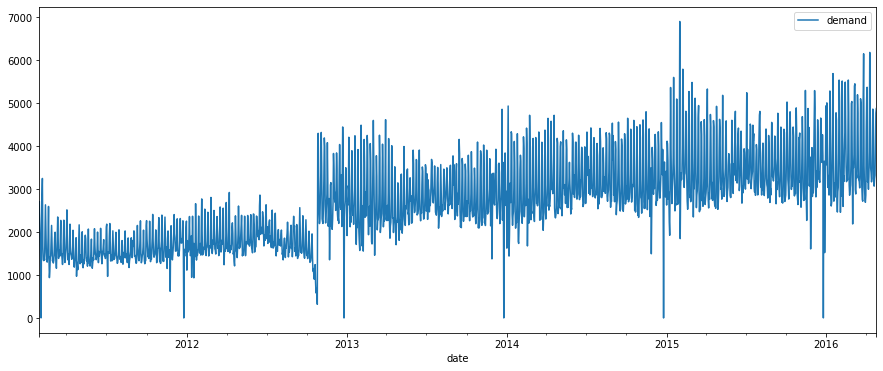

In [ ]:
train.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller as adf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(28).mean()
    rolstd = timeseries.rolling(28).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

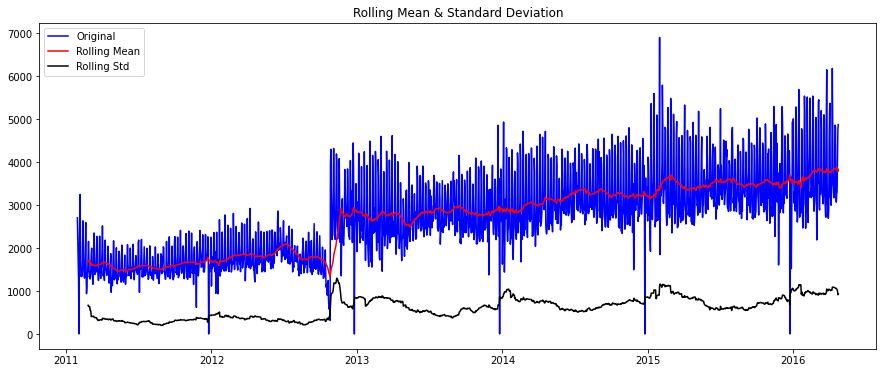

In [ ]:
test_stationarity(train)

In [ ]:
output = (adf(train['demand']))

In [ ]:
output

(-1.2354960437736828,
 0.6581429303624773,
 26,
 1886,
 {'1%': -3.433822016251123,
  '10%': -2.567586484303047,
  '5%': -2.8630736989499335},
 27846.253075359993)

In [ ]:
trainoutput = pd.Series(output[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in output[4].items():
        trainoutput['Critical Value (%s)'%key] = value
print(trainoutput)

Test Statistic                   -1.235496
p-value                           0.658143
#Lags Used                       26.000000
Number of Observations Used    1886.000000
Critical Value (1%)              -3.433822
Critical Value (5%)              -2.863074
Critical Value (10%)             -2.567586
dtype: float64


As p-value is quite greater than critical value, there is non stationarity which can be seen from an increasing rolling mean

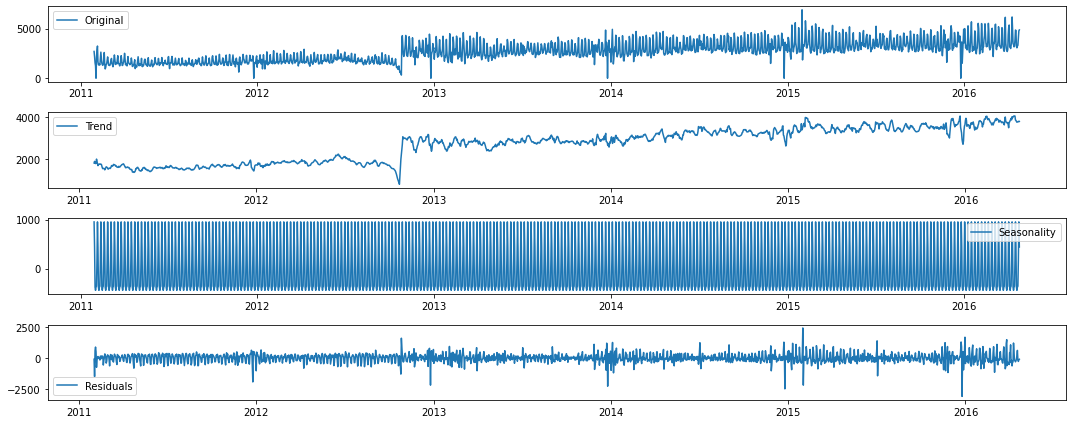

In [ ]:
#estimating trend and seasonlity
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
#divide into train and validation set
train = demand_WI_1_total[:'2016-04-24']
valid = demand_WI_1_total['2016-04-25':]


In [ ]:
train

,demand
date,
2011-01-29,2704
2011-01-30,2194
2011-01-31,1562
2011-02-01,1251
2011-02-02,2
...,...
2016-04-20,3242
2016-04-21,3324
2016-04-22,3991


In [ ]:
valid

,demand
date,
2016-04-25,3166
2016-04-26,3194
2016-04-27,3267
2016-04-28,3201
2016-04-29,4143
2016-04-30,5318
2016-05-01,5228
2016-05-02,3502
2016-05-03,3456


In [ ]:
train.shape,valid.shape

((1913, 1), (28, 1))

In [ ]:
train,valid

(            demand
 date              
 2011-01-29    2704
 2011-01-30    2194
 2011-01-31    1562
 2011-02-01    1251
 2011-02-02       2
 ...            ...
 2016-04-20    3242
 2016-04-21    3324
 2016-04-22    3991
 2016-04-23    4772
 2016-04-24    4874
 
 [1913 rows x 1 columns],             demand
 date              
 2016-04-25    3166
 2016-04-26    3194
 2016-04-27    3267
 2016-04-28    3201
 2016-04-29    4143
 2016-04-30    5318
 2016-05-01    5228
 2016-05-02    3502
 2016-05-03    3456
 2016-05-04    3444
 2016-05-05    3730
 2016-05-06    4142
 2016-05-07    5432
 2016-05-08    4059
 2016-05-09    3895
 2016-05-10    3227
 2016-05-11    3948
 2016-05-12    3682
 2016-05-13    3978
 2016-05-14    5527
 2016-05-15    5488
 2016-05-16    3505
 2016-05-17    3323
 2016-05-18    3242
 2016-05-19    3478
 2016-05-20    3813
 2016-05-21    5002
 2016-05-22    5054)

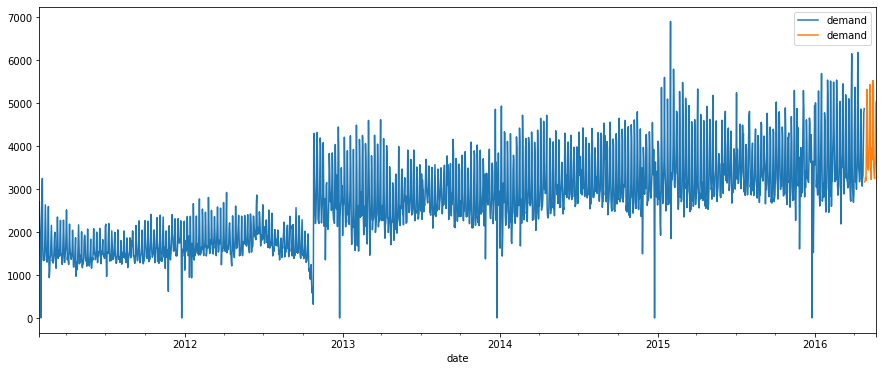

In [ ]:
#plotting the data
ax = train.plot()
valid.plot(ax=ax)

### we will first use arimax to account only for trend and then later will use sarimax to account for both trend and seasonality

In [ ]:
#building the model
from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29383.907, Time=3.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30573.666, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30575.628, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30575.564, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30571.671, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29722.486, Time=2.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29573.401, Time=1.97 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=28972.494, Time=4.93 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=29632.373, Time=3.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=29392.237, Time=4.39 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=5.74 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=29531.181, Time=4.52 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=28939.237, Time=6.43 sec
 ARIMA(4,1,4)(0,0,0)[0] interce

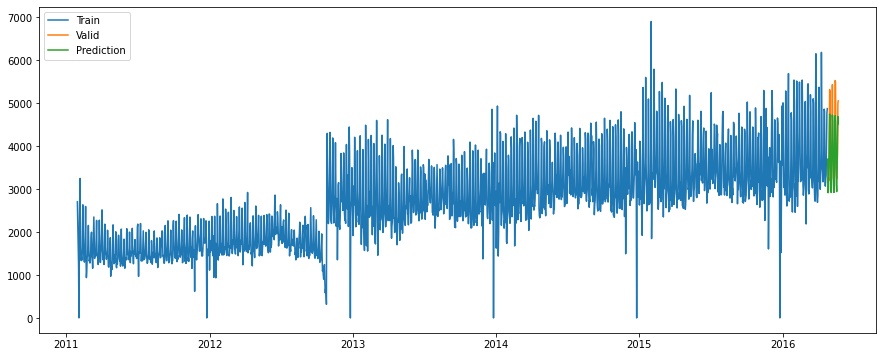

In [ ]:

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
forecast

,Prediction
date,
2016-04-25,3695.504689
2016-04-26,2915.584662
2016-04-27,2985.724133
2016-04-28,3481.644474
2016-04-29,4140.423718
2016-04-30,4745.941678
2016-05-01,4652.651029
2016-05-02,3810.211054
2016-05-03,3020.310900


In [ ]:
forecast['actual'] = valid['demand']

In [ ]:
forecast

,Prediction,actual
date,,
2016-04-25,3695.504689,3166
2016-04-26,2915.584662,3194
2016-04-27,2985.724133,3267
2016-04-28,3481.644474,3201
2016-04-29,4140.423718,4143
2016-04-30,4745.941678,5318
2016-05-01,4652.651029,5228
2016-05-02,3810.211054,3502
2016-05-03,3020.310900,3456


In [ ]:
from pmdarima.arima.utils import nsdiffs


In [ ]:
# estimate number of seasonal differences using a Canova-Hansen test
D = nsdiffs(train,
            m=12,  # commonly requires knowledge of dataset
            max_D=12,
            test='ch')  # -> 0

# or use the OCSB test (by default)
# nsdiffs(lynx,
#         m=10,
#         max_D=12,
#         test='ocsb')  # -> 0

In [ ]:
D

0

In [ ]:
#using sarimax to account for seasonality and then forecasting
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,m=12,D=0)
model.fit(train)

forecast_sarima = model.predict(n_periods=len(valid))
forecast_sarima = pd.DataFrame(forecast_sarima,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast_sarima, label='Prediction')
plt.legend(loc='best')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=29291.643, Time=10.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=30573.666, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=30414.879, Time=2.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=29964.080, Time=4.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=30571.671, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=29244.367, Time=9.36 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=29383.907, Time=3.45 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=29247.128, Time=25.12 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=29253.225, Time=10.67 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=27.34 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=29601.790, Time=6.58 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=29477.221, Time=7.90 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=29265.224, Time=10.21 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=28899.913, Time=13.35 sec
 ARIM

In [ ]:
forecast_sarima

,Prediction
date,
2016-04-25,3781.725118
2016-04-26,2994.341342
2016-04-27,2958.591238
2016-04-28,3459.803513
2016-04-29,4320.741868
2016-04-30,5002.477817
2016-05-01,4621.045690
2016-05-02,3718.094301
2016-05-03,3037.511660


In [ ]:
forecast_sarima['actual'] = valid['demand']

In [ ]:
forecast_sarima

,Prediction,actual
date,,
2016-04-25,3781.725118,3166
2016-04-26,2994.341342,3194
2016-04-27,2958.591238,3267
2016-04-28,3459.803513,3201
2016-04-29,4320.741868,4143
2016-04-30,5002.477817,5318
2016-05-01,4621.045690,5228
2016-05-02,3718.094301,3502
2016-05-03,3037.511660,3456


In [ ]:
pred_df = valid
pred_df['ARIMA_Prediction'] = forecast['Prediction'] 
pred_df['SARIMA_Prediction'] = forecast_sarima['Prediction'] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pred_df

,demand,ARIMA_Prediction,SARIMA_Prediction
date,,,
2016-04-25,3166,3695.570199,3781.725118
2016-04-26,3194,2915.622599,2994.341342
2016-04-27,3267,2985.646993,2958.591238
2016-04-28,3201,3481.606974,3459.803513
2016-04-29,4143,4140.468221,4320.741868
2016-04-30,5318,4745.947382,5002.477817
2016-05-01,5228,4652.630931,4621.045690
2016-05-02,3502,3810.261135,3718.094301
2016-05-03,3456,3020.353881,3037.511660


In [ ]:
pred_df.to_csv("/content/drive/MyDrive/Kaggle/Store_Wise_Forecasting/pred_df.csv")

### RMSE ARIMAX SARIMAX

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse_arima = mean_squared_error(pred_df.demand, pred_df.ARIMA_Prediction, squared=False)
print(rmse_arima)

467.48983605902504


In [ ]:
rmse_sarima = mean_squared_error(pred_df.demand, pred_df.SARIMA_Prediction, squared=False)
print(rmse_sarima)

449.7832129646914


## Prophet

In [ ]:
train

,demand
date,
2011-01-29,2704
2011-01-30,2194
2011-01-31,1562
2011-02-01,1251
2011-02-02,2
...,...
2016-04-20,3242
2016-04-21,3324
2016-04-22,3991


In [ ]:
valid

,demand
date,
2016-04-25,3166
2016-04-26,3194
2016-04-27,3267
2016-04-28,3201
2016-04-29,4143
2016-04-30,5318
2016-05-01,5228
2016-05-02,3502
2016-05-03,3456


In [ ]:
# Format data for prophet model using ds and y
train.reset_index() \
    .rename(columns={'date':'ds',
                     'demand':'y'}).head()

,ds,y
0,2011-01-29,2704
1,2011-01-30,2194
2,2011-01-31,1562
3,2011-02-01,1251
4,2011-02-02,2


In [ ]:
holidays = new_WI_1[~new_WI_1.event_name_1.isna()]
holidays = holidays[['date','event_name_1']]

In [ ]:
holidays = holidays.drop_duplicates(subset=['date'], keep='first')
holidays.reset_index(drop = True,inplace=True)

In [ ]:
holidays.head(50)

,date,event_name_1
0,2011-02-06,SuperBowl
1,2011-02-14,ValentinesDay
2,2011-02-21,PresidentsDay
3,2011-03-09,LentStart
4,2011-03-16,LentWeek2
5,2011-03-17,StPatricksDay
6,2011-03-20,Purim End
7,2011-04-24,OrthodoxEaster
8,2011-04-26,Pesach End
9,2011-05-05,Cinco De Mayo


In [ ]:
holidays.isna().sum()

date            0
event_name_1    0
dtype: int64

In [ ]:
holidays.shape

(154, 2)

In [ ]:
holidays.nunique()

date            154
event_name_1     30
dtype: int64

In [ ]:
# Format data for prophet model using ds and y
holidays = holidays.rename(columns={'date':'ds',
                     'event_name_1':'holiday'})
holidays = holidays[['holiday','ds']]

In [ ]:
holidays.dtypes

holiday    object
ds         object
dtype: object

In [ ]:
holidays['ds'] = pd.to_datetime(holidays['ds'])

In [ ]:
holidays.dtypes

holiday            object
ds         datetime64[ns]
dtype: object

In [ ]:
holidays

,holiday,ds
0,SuperBowl,2011-02-06
1,ValentinesDay,2011-02-14
2,PresidentsDay,2011-02-21
3,LentStart,2011-03-09
4,LentWeek2,2011-03-16
...,...,...
149,PresidentsDay,2016-02-15
150,LentWeek2,2016-02-17
151,StPatricksDay,2016-03-17
152,Purim End,2016-03-24


In [ ]:
holidays.holiday.value_counts()

StPatricksDay          6
LentStart              6
Purim End              6
SuperBowl              6
PresidentsDay          6
ValentinesDay          6
LentWeek2              6
Easter                 5
LaborDay               5
Halloween              5
Pesach End             5
NewYear                5
OrthodoxChristmas      5
Mother's day           5
VeteransDay            5
Thanksgiving           5
IndependenceDay        5
Chanukah End           5
MartinLutherKingDay    5
EidAlAdha              5
NBAFinalsStart         5
Eid al-Fitr            5
MemorialDay            5
NBAFinalsEnd           5
Ramadan starts         5
Christmas              5
ColumbusDay            5
Cinco De Mayo          4
Father's day           4
OrthodoxEaster         4
Name: holiday, dtype: int64

In [ ]:
# Setup and train model and fit
model = Prophet(holidays=holidays,daily_seasonality=True)
model.fit(train.reset_index() \
              .rename(columns={'date':'ds',
                               'demand':'y'}))

In [ ]:
valid

,demand
date,
2016-04-25,3166
2016-04-26,3194
2016-04-27,3267
2016-04-28,3201
2016-04-29,4143
2016-04-30,5318
2016-05-01,5228
2016-05-02,3502
2016-05-03,3456


In [ ]:
# Predict on training set with model
valid_fcst = model.predict(df=valid.reset_index() \
                                   .rename(columns={'date':'ds'}))

In [ ]:
valid_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Chanukah End,Chanukah End_lower,Chanukah End_upper,Christmas,Christmas_lower,Christmas_upper,Cinco De Mayo,Cinco De Mayo_lower,Cinco De Mayo_upper,ColumbusDay,ColumbusDay_lower,ColumbusDay_upper,Easter,Easter_lower,Easter_upper,Eid al-Fitr,Eid al-Fitr_lower,Eid al-Fitr_upper,EidAlAdha,EidAlAdha_lower,EidAlAdha_upper,Father's day,Father's day_lower,Father's day_upper,Halloween,Halloween_lower,Halloween_upper,IndependenceDay,IndependenceDay_lower,IndependenceDay_upper,LaborDay,LaborDay_lower,LaborDay_upper,LentStart,...,Purim End,Purim End_lower,Purim End_upper,Ramadan starts,Ramadan starts_lower,Ramadan starts_upper,StPatricksDay,StPatricksDay_lower,StPatricksDay_upper,SuperBowl,SuperBowl_lower,SuperBowl_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,ValentinesDay,ValentinesDay_lower,ValentinesDay_upper,VeteransDay,VeteransDay_lower,VeteransDay_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-04-25,4724.396386,2785.727425,3794.154273,4724.396386,4724.396386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1435.808208,-1435.808208,-1435.808208,-966.510616,-966.510616,-966.510616,0.0,0.0,0.0,-414.112310,-414.112310,-414.112310,-55.185283,-55.185283,-55.185283,0.0,0.0,0.0,3288.588178
1,2016-04-26,4725.222009,2785.651336,3768.751322,4725.222009,4725.222009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1471.864456,-1471.864456,-1471.864456,-966.510616,-966.510616,-966.510616,0.0,0.0,0.0,-450.770114,-450.770114,-450.770114,-54.583726,-54.583726,-54.583726,0.0,0.0,0.0,3253.357552
2,2016-04-27,4726.047631,2863.028412,3834.098221,4726.047631,4726.047631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1399.680061,-1399.680061,-1399.680061,-966.510616,-966.510616,-966.510616,0.0,0.0,0.0,-379.800966,-379.800966,-379.800966,-53.368479,-53.368479,-53.368479,0.0,0.0,0.0,3326.367570
3,2016-04-28,4726.873254,2854.647940,3863.336212,4726.873254,4726.873254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1360.810495,-1360.810495,-1360.810495,-966.510616,-966.510616,-966.510616,0.0,0.0,0.0,-342.633274,-342.633274,-342.633274,-51.666604,-51.666604,-51.666604,0.0,0.0,0.0,3366.062760
4,2016-04-29,4727.698877,3381.575765,4364.058654,4727.698877,4727.698877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-853.840630,-853.840630,-853.840630,-966.510616,-966.510616,-966.510616,0.0,0.0,0.0,162.281159,162.281159,162.281159,-49.611173,-49.611173,-49.611173,0.0,0.0,0.0,3873.858247
5,2016-04-30,4728.524500,4160.213218,5145.877884,4728.524500,4728.524500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-77.465964,-77.465964,-77.465964,-966.510616,-966.510616,-966.510616,0.0,0.0,0.0,936.381582,936.381582,936.381582,-47.336930

### RMSE Prophet With Event

In [ ]:
rmse_prophet = mean_squared_error(pred_df.demand, valid_fcst.yhat, squared=False)
print(rmse_prophet)

480.7124832655643


In [ ]:
# Setup and train model and fit Prophet Default
model_default = Prophet()
model_default.fit(train.reset_index() \
              .rename(columns={'date':'ds',
                               'demand':'y'}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Predict on training set with model
valid_fcst_default = model_default.predict(df=valid.reset_index() \
                                   .rename(columns={'date':'ds'}))

In [ ]:
valid_fcst_default

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-04-25,3738.593743,2697.673795,3826.470882,3738.593743,3738.593743,-441.439090,-441.439090,-441.439090,-379.919411,-379.919411,-379.919411,-61.519679,-61.519679,-61.519679,0.0,0.0,0.0,3297.154653
1,2016-04-26,3739.416722,2699.409476,3765.739146,3739.416722,3739.416722,-506.406379,-506.406379,-506.406379,-445.233524,-445.233524,-445.233524,-61.172855,-61.172855,-61.172855,0.0,0.0,0.0,3233.010343
2,2016-04-27,3740.239700,2744.979622,3903.572961,3740.239700,3740.239700,-440.908533,-440.908533,-440.908533,-380.666698,-380.666698,-380.666698,-60.241836,-60.241836,-60.241836,0.0,0.0,0.0,3299.331167
3,2016-04-28,3741.062679,2783.033912,3887.128383,3741.062679,3741.062679,-419.126409,-419.126409,-419.126409,-360.267176,-360.267176,-360.267176,-58.859233,-58.859233,-58.859233,0.0,0.0,0.0,3321.936270
4,2016-04-29,3741.885657,3318.117905,4368.491546,3741.885657,3741.885657,110.920666,110.920666,110.920666,168.081830,168.081830,168.081830,-57.161163,-57.161163,-57.161163,0.0,0.0,0.0,3852.806324
5,2016-04-30,3742.708636,4102.285908,5152.814685,3742.708636,3742.708636,896.815986,896.815986,896.815986,952.098250,952.098250,952.098250,-55.282264,-55.282264,-55.282264,0.0,0.0,0.0,4639.524622
6,2016-05-01,3743.531615,3571.750676,4669.741569,3743.531615,3743.531615,392.555882,392.555882,392.555882,445.906730,445.906730,445.906730,-53.350848,-53.350848,-53.350848,0.0,0.0,0.0,4136.087497
7,2016-05-02,3744.354593,2754.184160,3911.211872,3744.354593,3744.354593,-431.403784,-431.403784,-431.403784,-379.919411,-379.919411,-379.919411,-51.484372,-51.484372,-51.484372,0.0,0.0,0.0,3312.950810
8,2016-05-03,3745.177572,2668.434601,3821.801759,3745.177572,3745.177572,-495.018870,-495.018870,-495.018870,-445.233524,-445.233524,-445.233524,-49.785346,-49.785346,-49.785346,0.0,0.0,0.0,3250.158702
9,2016-05-04,3746.000550,2779.418523,3886.378266,3746.000550,3746.000550,-429.004517,-429.004517,-429.004517,-380.666698,-380.666698,-380.666698,-48.337819,-48.337819,-48.337819,0.0,0.0,0.0,3316.996033


### RMSE Prophet Default

In [ ]:
rmse_prophet_default = mean_squared_error(pred_df.demand, valid_fcst_default.yhat, squared=False)
print(rmse_prophet_default)

501.69554601078346


In [ ]:
pred_df = pd.read_csv("/content/drive/MyDrive/Kaggle/Store_Wise_Forecasting/pred_df.csv")

In [ ]:
pred_df

,date,demand,ARIMA_Prediction,SARIMA_Prediction
0,2016-04-25,3166,3695.570199,3781.725118
1,2016-04-26,3194,2915.622599,2994.341342
2,2016-04-27,3267,2985.646993,2958.591238
3,2016-04-28,3201,3481.606974,3459.803513
4,2016-04-29,4143,4140.468221,4320.741868
5,2016-04-30,5318,4745.947382,5002.477817
6,2016-05-01,5228,4652.630931,4621.045690
7,2016-05-02,3502,3810.261135,3718.094301
8,2016-05-03,3456,3020.353881,3037.511660
9,2016-05-04,3444,2920.635996,2934.527983


In [ ]:
pred_df['Prophet_with_holiday'] = valid_fcst.yhat

In [ ]:
pred_df['Prophet_default'] = valid_fcst_default.yhat

In [ ]:
pred_df

,date,demand,ARIMA_Prediction,SARIMA_Prediction,Prophet_with_holiday,Prophet_default
0,2016-04-25,3166,3695.570199,3781.725118,3288.588178,3297.154653
1,2016-04-26,3194,2915.622599,2994.341342,3253.357552,3233.010343
2,2016-04-27,3267,2985.646993,2958.591238,3326.367570,3299.331167
3,2016-04-28,3201,3481.606974,3459.803513,3366.062760,3321.936270
4,2016-04-29,4143,4140.468221,4320.741868,3873.858247,3852.806324
5,2016-04-30,5318,4745.947382,5002.477817,4651.058536,4639.524622
6,2016-05-01,5228,4652.630931,4621.045690,4206.517435,4136.087497
7,2016-05-02,3502,3810.261135,3718.094301,3306.899096,3312.950810
8,2016-05-03,3456,3020.353881,3037.511660,3273.235786,3250.158702
9,2016-05-04,3444,2920.635996,2934.527983,3346.945382,3316.996033


In [ ]:
calendar[['date','weekday']][1913:1941]

,date,weekday
1913,2016-04-25,Monday
1914,2016-04-26,Tuesday
1915,2016-04-27,Wednesday
1916,2016-04-28,Thursday
1917,2016-04-29,Friday
1918,2016-04-30,Saturday
1919,2016-05-01,Sunday
1920,2016-05-02,Monday
1921,2016-05-03,Tuesday
1922,2016-05-04,Wednesday


In [ ]:
test_day_list = calendar['weekday'][1913:1941].to_list()

In [ ]:
test_day_list

['Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday']

In [ ]:
pred_df['weekday'] = test_day_list

In [ ]:
pred_df

,date,demand,ARIMA_Prediction,SARIMA_Prediction,Prophet_with_holiday,Prophet_default,weekday
0,2016-04-25,3166,3695.570199,3781.725118,3288.588178,3297.154653,Monday
1,2016-04-26,3194,2915.622599,2994.341342,3253.357552,3233.010343,Tuesday
2,2016-04-27,3267,2985.646993,2958.591238,3326.367570,3299.331167,Wednesday
3,2016-04-28,3201,3481.606974,3459.803513,3366.062760,3321.936270,Thursday
4,2016-04-29,4143,4140.468221,4320.741868,3873.858247,3852.806324,Friday
5,2016-04-30,5318,4745.947382,5002.477817,4651.058536,4639.524622,Saturday
6,2016-05-01,5228,4652.630931,4621.045690,4206.517435,4136.087497,Sunday
7,2016-05-02,3502,3810.261135,3718.094301,3306.899096,3312.950810,Monday
8,2016-05-03,3456,3020.353881,3037.511660,3273.235786,3250.158702,Tuesday
9,2016-05-04,3444,2920.635996,2934.527983,3346.945382,3316.996033,Wednesday


In [ ]:
pred_df.to_csv("/content/drive/MyDrive/Kaggle/Store_Wise_Forecasting/pred_df_v2.csv",index=False)

In [ ]:
pred_df

,date,demand,ARIMA_Prediction,SARIMA_Prediction,Prophet_with_holiday,Prophet_default,weekday
0,2016-04-25,3166,3695.570199,3781.725118,3288.588178,3297.154653,Monday
1,2016-04-26,3194,2915.622599,2994.341342,3253.357552,3233.010343,Tuesday
2,2016-04-27,3267,2985.646993,2958.591238,3326.367570,3299.331167,Wednesday
3,2016-04-28,3201,3481.606974,3459.803513,3366.062760,3321.936270,Thursday
4,2016-04-29,4143,4140.468221,4320.741868,3873.858247,3852.806324,Friday
5,2016-04-30,5318,4745.947382,5002.477817,4651.058536,4639.524622,Saturday
6,2016-05-01,5228,4652.630931,4621.045690,4206.517435,4136.087497,Sunday
7,2016-05-02,3502,3810.261135,3718.094301,3306.899096,3312.950810,Monday
8,2016-05-03,3456,3020.353881,3037.511660,3273.235786,3250.158702,Tuesday
9,2016-05-04,3444,2920.635996,2934.527983,3346.945382,3316.996033,Wednesday


In [ ]:
# Plot prediction as per date
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(x=pred_df["date"], 
                         y=pred_df['demand'],
                         mode="lines",
                         name="ACTUAL",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=pred_df["date"], 
                         y=pred_df["ARIMA_Prediction"],
                         mode="lines",
                         name="ARIMA",
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=pred_df["date"], 
                         y=pred_df["SARIMA_Prediction"],
                         mode="lines",
                         name="SARIMA",
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=pred_df["date"], 
                         y=pred_df["Prophet_with_holiday"],
                         mode="lines",
                         name="Prophet_with_holiday",
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=pred_df["date"], 
                         y=pred_df["Prophet_default"],
                         mode="lines",
                         name="Prophet_default",
                         ),
             
              row=1,col=1           
              )



fig.update_layout(height=500, title_text="Pred")
fig.show()

In [ ]:
pred_df

,date,demand,ARIMA_Prediction,SARIMA_Prediction,Prophet_with_holiday,Prophet_default,weekday
0,2016-04-25,3166,3695.570199,3781.725118,3288.588178,3297.154653,Monday
1,2016-04-26,3194,2915.622599,2994.341342,3253.357552,3233.010343,Tuesday
2,2016-04-27,3267,2985.646993,2958.591238,3326.367570,3299.331167,Wednesday
3,2016-04-28,3201,3481.606974,3459.803513,3366.062760,3321.936270,Thursday
4,2016-04-29,4143,4140.468221,4320.741868,3873.858247,3852.806324,Friday
5,2016-04-30,5318,4745.947382,5002.477817,4651.058536,4639.524622,Saturday
6,2016-05-01,5228,4652.630931,4621.045690,4206.517435,4136.087497,Sunday
7,2016-05-02,3502,3810.261135,3718.094301,3306.899096,3312.950810,Monday
8,2016-05-03,3456,3020.353881,3037.511660,3273.235786,3250.158702,Tuesday
9,2016-05-04,3444,2920.635996,2934.527983,3346.945382,3316.996033,Wednesday


In [ ]:

weekday_pred_sum = pred_df.groupby("weekday")[["demand","ARIMA_Prediction", "SARIMA_Prediction","Prophet_with_holiday","Prophet_default"]].agg("sum").reset_index()

In [ ]:
weekday_pred_sum

,weekday,demand,ARIMA_Prediction,SARIMA_Prediction,Prophet_with_holiday,Prophet_default
0,Friday,16076,16774.013926,17330.761044,15554.715534,15477.550287
1,Monday,14068,15161.044519,15065.686388,13231.984721,13259.792054
2,Saturday,21279,18872.328101,19652.455153,18656.020367,18622.030624
3,Sunday,19829,18298.978011,18506.464027,16870.294782,16606.538790
4,Thursday,14091,13796.161634,13826.303750,13530.402170,13356.554387
5,Tuesday,13200,12124.854667,12056.382651,13089.255855,13003.820896
6,Wednesday,13901,11769.532768,11635.467237,13377.310142,13268.139254


In [ ]:
# Plot 
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(x=weekday_pred_sum["weekday"], 
                         y=weekday_pred_sum['demand'],
                         mode="lines",
                         name="ACTUAL",
                         ),

              row=1,col=1         
              )

fig.add_trace(go.Scatter(x=weekday_pred_sum["weekday"], 
                         y=weekday_pred_sum["ARIMA_Prediction"],
                         mode="lines",
                         name="ARIMA",
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=weekday_pred_sum["weekday"], 
                         y=weekday_pred_sum["SARIMA_Prediction"],
                         mode="lines",
                         name="SARIMA",
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=weekday_pred_sum["weekday"], 
                         y=weekday_pred_sum["Prophet_with_holiday"],
                         mode="lines",
                         name="Prophet_with_holiday",
                         ),
             
              row=1,col=1           
              )

fig.add_trace(go.Scatter(x=weekday_pred_sum["weekday"], 
                         y=weekday_pred_sum["Prophet_default"],
                         mode="lines",
                         name="Prophet_default",
                         ),
             
              row=1,col=1           
              )

fig.update_layout(height=500, title_text="Pred")
fig.show()